# Movie Data Analysis Microsoft <br>


## Business Understanding

- The key stakeholders for this analysis project are the higher ups in Microsoft such as the CEO and other C-Suite executives
- Microsoft is entering a very saturated industry with many big competitors, a large volume of movies and a wide variety of movie types
  - How can Microsoft best navigate starting a new movie studio?
- A good measure of success in any industry is the return on investment and profit
- In our analysis we focused in on recent movies from 2010-2019 and their profitability
- The more granular focus of our analysis was in the profitability of top: movie genres, movie run times and movie actors/actresses
- Our recommendations can be used to start off the process of profitable movie production at Microsoft


## Data Understanding

- The data used came from the website The Numbers in the tn_movie_budget.csv data file as well as the website IMBDV from the im.db data file
- The Numbers data was loaded from a CSV file using the Python package Pandas and saved into a Pandas DataFrame
 - The Numbers data included quantitative data on movie production budgets, domestic as well as worldwide gross earnings 
 - We used budget and worldwide gross earnings to calculate profit by movie

- IMDB was loaded in from a .db file using sqlite3 for loading the data via SQL queries, 
 - This data was also stored into Pandas DataFrames
 - IMDB data contained categorical information on movie start years, run times, peoples profession associated with the movie (actors, actresses, writers, directors, producers etc..) as well as quantitative average rating data
 - This data was limited to movies between the years 2010-2019 which dictated the scope of our movie analysis



## Data Wrangling

In [1]:
# Importing the necessary python packages

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

### Import data from *The Numbers* movie budgets file with data on productions costs and gross box office data <br>  and cleaning that data

In [2]:
# Importing csv and reading into a pandas DataFrame
movie_budgets =  pd.read_csv('./zippedData/tn.movie_budgets.csv')

In [3]:
# Looking at data frame
movie_budgets.shape

(5782, 6)

In [4]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Import data from *IMDB* database  with SQL queries for variety of data on movie type, ratings, runtime, actors etc.

In [5]:
# Connecting to sql file and create cursor object
con = sqlite3.connect('./zippedData/im.db')
cursor_obj = con.cursor()

In [6]:
# Taking a look at the schema of the im.db file 

In [7]:
%%bash

sqlite3 'zippedData/im.db'

.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [8]:
# Selecting columns from the movie_basics table of IMBD database
imdb_moviebasics = pd.read_sql  ("""
SELECT movie_id,
        primary_title as title,
        start_year as year,
        CAST(runtime_minutes as int) as runtime,
        genres
FROM movie_basics


""", con)

In [9]:
imdb_moviebasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   movie_id  146144 non-null  object 
 1   title     146144 non-null  object 
 2   year      146144 non-null  int64  
 3   runtime   114405 non-null  float64
 4   genres    140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [10]:
# Reassigning the data frame to only have movies that occur after 2010
imdb_moviebasics_from_2010 = imdb_moviebasics.loc[(imdb_moviebasics['year'] > 2010)]

In [11]:
imdb_moviebasics['year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: year, dtype: int64

In [12]:
imdb_moviebasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   movie_id  146144 non-null  object 
 1   title     146144 non-null  object 
 2   year      146144 non-null  int64  
 3   runtime   114405 non-null  float64
 4   genres    140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.6+ MB


In [13]:
imdb_moviebasics_from_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134295 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   movie_id  134295 non-null  object 
 1   title     134295 non-null  object 
 2   year      134295 non-null  int64  
 3   runtime   104419 non-null  float64
 4   genres    129284 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.1+ MB


In [14]:
imdb_moviebasics['year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: year, dtype: int64

In [15]:
imdb_moviebasics_from_2010['year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: year, dtype: int64

In [16]:
# Querying the IMDB dataset for movie info
imdb_d_mb_princ = pd.read_sql  ("""
SELECT mb.movie_id,
        mb.primary_title as title,
        mb.start_year as year,
        mb.runtime_minutes as runtime,
        mb.genres,
        d.person_id as director,
        m.averagerating as "average rating",
        m.numvotes as "number of votes",
        p.person_id,
        p.category
        
        
FROM movie_basics as mb
    INNER JOIN
    directors as d
    ON
    mb.movie_id = d.movie_id
    
    INNER JOIN
    movie_ratings as m
    ON
    mb.movie_id = m.movie_id
    
    INNER JOIN
    principals as p
    ON
    mb.movie_id = p.movie_id

""", con)


In [17]:
# Quering the IMDB dataset for person_id info, ie. names of director, actor, writer etc.
imdb_pers = pd.read_sql  ("""

SELECT person_id, primary_name
FROM persons as per

""", con)

## Data Cleaning

In [18]:
# Adding the names of persons affiliated with each movie by their "person_id" to the IMDB dataframe

imdb_data = imdb_d_mb_princ.merge(imdb_pers, how = 'inner', on = 'person_id')

In [19]:
imdb_data

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad
1,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad
2,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad
3,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad
4,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0023551,writer,Abrar Alvi
...,...,...,...,...,...,...,...,...,...,...,...
1658069,tt9914942,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5,nm7817936,actor,Pau Escobar
1658070,tt9914942,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5,nm7817936,actor,Pau Escobar
1658071,tt9916160,Drømmeland,2019,72.0,Documentary,nm5684093,6.5,11,nm5684093,director,Joost van der Wiel
1658072,tt9916160,Drømmeland,2019,72.0,Documentary,nm5684093,6.5,11,nm6460816,self,Nils Leidal


In [20]:
# Drop duplicates
imdb_data.drop_duplicates(subset = ['movie_id', 'title','person_id','year','runtime', 'genres', 'director'], inplace = True)


In [21]:
imdb_data.shape

(739829, 11)

In [22]:
imdb_data.head(50)

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0006210,composer,Naushad
4,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0023551,writer,Abrar Alvi
8,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77,nm0347899,writer,Gulzar
12,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,6.1,13,nm0347899,writer,Gulzar
13,tt0357717,Haar Jeet,2018,NaN,Drama,nm1065099,5.1,9,nm0347899,writer,Gulzar
15,tt1946280,Noukadubi,2011,135.0,"Drama,Romance",nm0315916,7.6,626,nm0347899,writer,Gulzar
18,tt2063745,Kya Dilli Kya Lahore,2014,98.0,"Drama,History,War",nm0704694,7.5,1741,nm0347899,writer,Gulzar
23,tt2063745,Kya Dilli Kya Lahore,2014,98.0,"Drama,History,War",nm2264108,7.5,1741,nm0347899,writer,Gulzar
28,tt4940456,Mirzya,2016,129.0,"Drama,Musical,Romance",nm1018493,4.7,1548,nm0347899,writer,Gulzar
29,tt5764024,OK Jaanu,2017,135.0,"Drama,Romance",nm1249945,5.2,3240,nm0347899,writer,Gulzar


In [23]:
# Taking out names of writers, composers etc. from the dataframe
# and leaving only rows with actor, actress and director
imdb_data = imdb_data.loc[(imdb_data['category'] == 'actress') | (imdb_data['category'] == 'director') | (imdb_data['category'] == 'actor')]

In [24]:
# Values counts for the category column
# See much more data abailable for (actor + acress) rather than director
imdb_data['category'].value_counts()

actor       177218
director    121239
actress     105157
Name: category, dtype: int64

#### Only interested in  "significant" movies which we defined as having at least 10,000 votes in the IMDB database

In [25]:
# Reassigning the data frame so it keeps the movies that only have more than 10,000 votes
imdb_data = imdb_data.loc[imdb_data['number of votes'] > 10000]

#### Merging the *The Numbers* movie budget data with *IMDB* data 

In [26]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [27]:
# Merging the two data frames based on the title and movie columns respectively to create new data frame
imdb_newdata = imdb_data.merge(movie_budgets, how = "inner", left_on = 'title', right_on = 'movie')

In [28]:
# Taking a view of the new data frame
imdb_newdata

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
1,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0637518,director,Phillip Noyce,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
2,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0000630,actor,Liev Schreiber,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
3,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0001401,actress,Angelina Jolie,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
4,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0252230,actor,Chiwetel Ejiofor,50,"Jul 23, 2010",Salt,"$130,000,000","$118,311,368","$290,650,494"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm2197025,director,Deniz Gamze Ergüven,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"
7786,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm2379003,actress,Elit Iscan,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"
7787,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm7322143,actress,Günes Sensoy,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"
7788,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm7322144,actress,Doga Zeynep Doguslu,21,"Nov 20, 2015",Mustang,"$1,400,000","$845,464","$5,552,584"


In [29]:
# Checking the number of unique movies in this new merged dataframe
imdb_newdata['movie_id'].nunique()

1332

In [30]:
# Dropping 'id' column from dataframe, using instead 'movie_id' from IMDB
# Dropping 'movie' column, using isntead 'title' from IMDB
imdb_newdata.drop(columns = 'id', inplace = True)
imdb_newdata.drop(columns = 'movie', inplace = True)

In [31]:
# Making sure there are no null values and checking data types
imdb_newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7790 entries, 0 to 7789
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           7790 non-null   object 
 1   title              7790 non-null   object 
 2   year               7790 non-null   int64  
 3   runtime            7790 non-null   float64
 4   genres             7790 non-null   object 
 5   director           7790 non-null   object 
 6   average rating     7790 non-null   float64
 7   number of votes    7790 non-null   int64  
 8   person_id          7790 non-null   object 
 9   category           7790 non-null   object 
 10  primary_name       7790 non-null   object 
 11  release_date       7790 non-null   object 
 12  production_budget  7790 non-null   object 
 13  domestic_gross     7790 non-null   object 
 14  worldwide_gross    7790 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 973.8+ KB


#### Cleaining the Budget and Gross Earnings columns to creat a Profit column

In [32]:
# Stripping the money sign from each column
imdb_newdata['production_budget'] = imdb_newdata['production_budget'].apply(lambda x: x.strip('$')) 
imdb_newdata['domestic_gross'] = imdb_newdata['domestic_gross'].apply(lambda x: x.strip('$'))
imdb_newdata['worldwide_gross'] = imdb_newdata['worldwide_gross'].apply(lambda x: x.strip('$'))

In [33]:
# Taking out the ","s and changing the object to a numerical datatype
imdb_newdata['production_budget'] = imdb_newdata['production_budget'].apply(lambda x: int(x.replace(',','')))
imdb_newdata['domestic_gross'] = imdb_newdata['domestic_gross'].apply(lambda x: int(x.replace(',','')))
imdb_newdata['worldwide_gross'] = imdb_newdata['worldwide_gross'].apply(lambda x: int(x.replace(',','')))

In [34]:
# Checking the columns have changed to numerical datatype
imdb_newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7790 entries, 0 to 7789
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           7790 non-null   object 
 1   title              7790 non-null   object 
 2   year               7790 non-null   int64  
 3   runtime            7790 non-null   float64
 4   genres             7790 non-null   object 
 5   director           7790 non-null   object 
 6   average rating     7790 non-null   float64
 7   number of votes    7790 non-null   int64  
 8   person_id          7790 non-null   object 
 9   category           7790 non-null   object 
 10  primary_name       7790 non-null   object 
 11  release_date       7790 non-null   object 
 12  production_budget  7790 non-null   int64  
 13  domestic_gross     7790 non-null   int64  
 14  worldwide_gross    7790 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 973.8+ KB


In [35]:
# Creating a new column -- profit
imdb_newdata['profit'] = imdb_newdata['worldwide_gross'] - imdb_newdata['production_budget']

In [36]:
imdb_newdata

,movie_id,title,year,runtime,genres,director,average rating,number of votes,person_id,category,primary_name,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0646037,actor,Daniel Olbrychski,"Jul 23, 2010",130000000,118311368,290650494,160650494
1,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0637518,director,Phillip Noyce,"Jul 23, 2010",130000000,118311368,290650494,160650494
2,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0000630,actor,Liev Schreiber,"Jul 23, 2010",130000000,118311368,290650494,160650494
3,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0001401,actress,Angelina Jolie,"Jul 23, 2010",130000000,118311368,290650494,160650494
4,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",nm0637518,6.4,277204,nm0252230,actor,Chiwetel Ejiofor,"Jul 23, 2010",130000000,118311368,290650494,160650494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm2197025,director,Deniz Gamze Ergüven,"Nov 20, 2015",1400000,845464,5552584,4152584
7786,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm2379003,actress,Elit Iscan,"Nov 20, 2015",1400000,845464,5552584,4152584
7787,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm7322143,actress,Günes Sensoy,"Nov 20, 2015",1400000,845464,5552584,4152584
7788,tt3966404,Mustang,2015,97.0,Drama,nm2197025,7.6,30899,nm7322144,actress,Doga Zeynep Doguslu,"Nov 20, 2015",1400000,845464,5552584,4152584


In [37]:
# Taking out individuals persons columns to looks at movies only

imdb_newest_data = imdb_newdata.drop(columns = 'director', inplace = True)
imdb_newest_data = imdb_newdata.drop(columns = 'person_id', inplace = True)
imdb_newest_data = imdb_newdata.drop(columns = 'category', inplace = True)
imdb_newest_data = imdb_newdata.drop(columns = 'primary_name', inplace = True)


# Drop duplicated rows of the same movie
imdb_newest_data = imdb_newdata.drop_duplicates(subset = ['movie_id'])
imdb_newest_data

,movie_id,title,year,runtime,genres,average rating,number of votes,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,"Action,Mystery,Thriller",6.4,277204,"Jul 23, 2010",130000000,118311368,290650494,160650494
5,tt4669788,On the Basis of Sex,2018,120.0,"Biography,Drama",6.9,12083,"Dec 25, 2018",20000000,24622687,38073377,18073377
10,tt1563742,Overboard,2018,112.0,"Comedy,Romance",5.9,25607,"May 4, 2018",12000000,50316123,85369830,73369830
15,tt1416801,Kill the Irishman,2011,106.0,"Biography,Crime,Drama",7.1,41504,"Mar 11, 2011",12000000,1188194,1188194,-10811806
20,tt1931533,Seven Psychopaths,2012,110.0,"Comedy,Crime",7.2,223493,"Oct 12, 2012",13500000,15024049,33035736,19535736
...,...,...,...,...,...,...,...,...,...,...,...,...
7765,tt2375605,The Act of Killing,2012,117.0,"Crime,Documentary",8.2,31115,"Jul 19, 2013",1000000,486919,1227316,227316
7774,tt3717490,Power Rangers,2017,124.0,"Action,Adventure,Sci-Fi",6.0,92013,"Mar 24, 2017",120000000,85364450,142531552,22531552
7779,tt6133466,The First Purge,2018,98.0,"Action,Horror,Sci-Fi",5.1,41741,"Jul 4, 2018",13000000,69488745,136617305,123617305
7784,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628,"Sep 21, 2018",5000000,6352306,6653715,1653715


In [38]:
# Looking at genres information
imdb_newdata['genres'].value_counts()

Adventure,Animation,Comedy    570
Comedy                        355
Action,Adventure,Sci-Fi       310
Comedy,Drama,Romance          277
Comedy,Drama                  244
                             ... 
Action                          4
Documentary,Drama               4
Documentary                     3
Music                           2
Action,Comedy,Documentary       1
Name: genres, Length: 207, dtype: int64

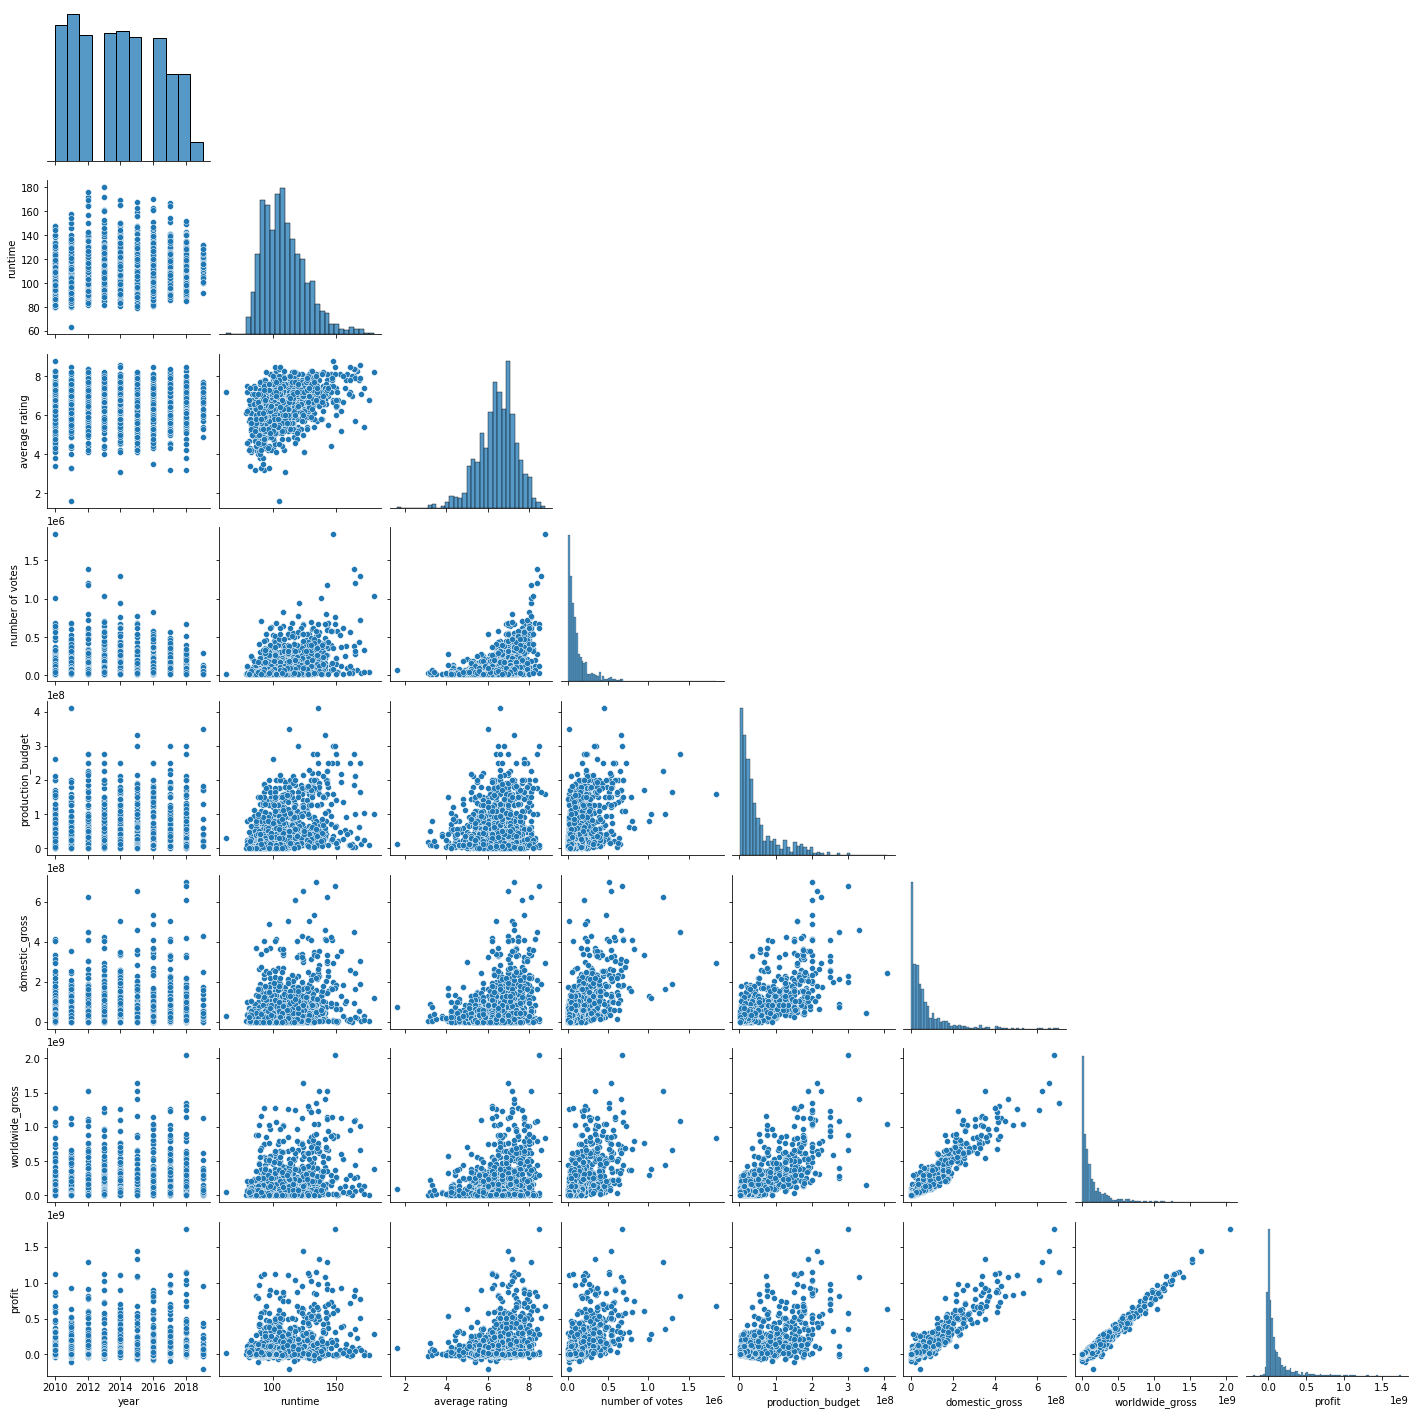

In [39]:
# Doing a pairplot to take a holistic look at the data
sns.pairplot(imdb_newest_data, corner = True)
plt.show()

## 1) Analyze profit by Genre
#### The 'genres' columns lists up to 3 separate genres per movie, we consider each genre of a movie as its own record

In [40]:
# Getting rid of the commas in the column values genres to make a list
imdb_newest_data['genres'] = imdb_newest_data['genres'].str.split(',')

# using the explode method to seperate genre values
imdb_newest_data = imdb_newest_data.loc[:].explode('genres')

<ipython-input-40-9375f7761781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_newest_data['genres'] = imdb_newest_data['genres'].str.split(',')


In [41]:
imdb_newest_data

,movie_id,title,year,runtime,genres,average rating,number of votes,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,Action,6.4,277204,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Mystery,6.4,277204,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Thriller,6.4,277204,"Jul 23, 2010",130000000,118311368,290650494,160650494
5,tt4669788,On the Basis of Sex,2018,120.0,Biography,6.9,12083,"Dec 25, 2018",20000000,24622687,38073377,18073377
5,tt4669788,On the Basis of Sex,2018,120.0,Drama,6.9,12083,"Dec 25, 2018",20000000,24622687,38073377,18073377
...,...,...,...,...,...,...,...,...,...,...,...,...
7779,tt6133466,The First Purge,2018,98.0,Action,5.1,41741,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Horror,5.1,41741,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Sci-Fi,5.1,41741,"Jul 4, 2018",13000000,69488745,136617305,123617305
7784,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628,"Sep 21, 2018",5000000,6352306,6653715,1653715


In [42]:
imdb_newest_data['genres'].value_counts()

Drama          672
Comedy         461
Action         419
Adventure      341
Thriller       249
Crime          230
Romance        182
Horror         168
Sci-Fi         140
Biography      131
Mystery        128
Fantasy        119
Animation       92
Family          70
History         40
Music           36
Sport           26
War             13
Western         10
Documentary      9
Musical          5
Name: genres, dtype: int64

#### Filter down the 21 genre types to the top 13 by movie counts

In [43]:
list_of_top_13_genres = imdb_newest_data['genres'].value_counts().index[0:13]

In [44]:
list_of_top_13_genres

Index(['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Crime',
       'Romance', 'Horror', 'Sci-Fi', 'Biography', 'Mystery', 'Fantasy',
       'Animation'],
      dtype='object')

In [45]:
# creating new data frame for the larger columns of movies produced
genre_bar_df_profit = imdb_newest_data[imdb_newest_data['genres'].isin(list_of_top_13_genres)]


In [46]:
top_13_sorted = genre_bar_df_profit.groupby('genres').median().sort_values(by = 'profit', ascending = False)

In [47]:
top_13 = top_13_sorted.reset_index()

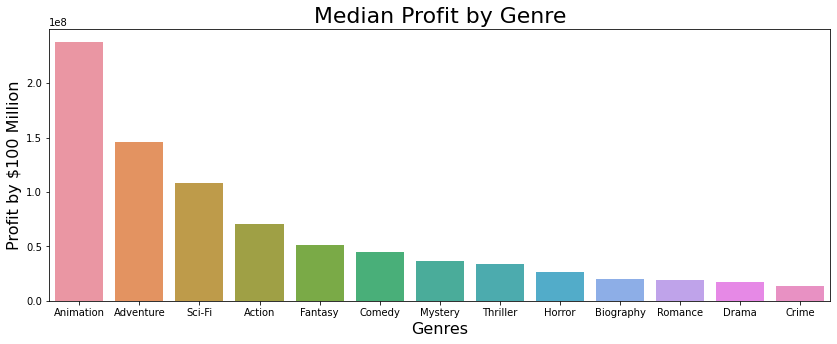

In [48]:
# plotting the genres and there average profit with seaborn
fig, ax = plt.subplots(figsize = (14, 5))
sns.barplot(x = 'genres', y = 'profit', data = top_13, estimator = np.median)

ax.set_title('Median Profit by Genre', fontsize = 22)
ax.set_xlabel('Genres', fontsize = 16)
ax.set_ylabel('Profit by $100 Million', fontsize = 16)

plt.show()

### Analysis
- This Barplot shows the top 13 genres by their respective Median profit
- We conclude the Animation, Adventure, Sci-Fi and Action are the best genres to choose for profitability

### <ins>Recommendation # 1<ins>

- Based on the results shown above we recommend Microsoft pursue 1 of the top 4 genres shown here with the greatest Median Profit: Animation, Adventure, Sci-Fi and Action




## 2) Analyze Profit by Run Time

### Used dataframe with movie genres "exploded" to analyze runtime by genre for top 4 genres

In [49]:
imdb_newest_data

,movie_id,title,year,runtime,genres,average rating,number of votes,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,Action,6.4,277204,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Mystery,6.4,277204,"Jul 23, 2010",130000000,118311368,290650494,160650494
0,tt0944835,Salt,2010,100.0,Thriller,6.4,277204,"Jul 23, 2010",130000000,118311368,290650494,160650494
5,tt4669788,On the Basis of Sex,2018,120.0,Biography,6.9,12083,"Dec 25, 2018",20000000,24622687,38073377,18073377
5,tt4669788,On the Basis of Sex,2018,120.0,Drama,6.9,12083,"Dec 25, 2018",20000000,24622687,38073377,18073377
...,...,...,...,...,...,...,...,...,...,...,...,...
7779,tt6133466,The First Purge,2018,98.0,Action,5.1,41741,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Horror,5.1,41741,"Jul 4, 2018",13000000,69488745,136617305,123617305
7779,tt6133466,The First Purge,2018,98.0,Sci-Fi,5.1,41741,"Jul 4, 2018",13000000,69488745,136617305,123617305
7784,tt8632862,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628,"Sep 21, 2018",5000000,6352306,6653715,1653715


In [50]:
# Top 4 genres by median profit
top_4_genres = imdb_newest_data[
    imdb_newest_data['genres'].str.contains('Action|Adventure|Animation|Sci-Fi', regex = True, na=False)
    ]

In [51]:
top_4_genres

,movie_id,title,year,runtime,genres,average rating,number of votes,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,tt0944835,Salt,2010,100.0,Action,6.4,277204,"Jul 23, 2010",130000000,118311368,290650494,160650494
25,tt1981107,The Young and Prodigious T.S. Spivet,2013,105.0,Action,7.1,15372,"Jul 31, 2015",33000000,176847,357687,-32642313
25,tt1981107,The Young and Prodigious T.S. Spivet,2013,105.0,Adventure,7.1,15372,"Jul 31, 2015",33000000,176847,357687,-32642313
35,tt0458339,Captain America: The First Avenger,2011,124.0,Action,6.9,668137,"Jul 22, 2011",140000000,176654505,370569776,230569776
35,tt0458339,Captain America: The First Avenger,2011,124.0,Adventure,6.9,668137,"Jul 22, 2011",140000000,176654505,370569776,230569776
...,...,...,...,...,...,...,...,...,...,...,...,...
7774,tt3717490,Power Rangers,2017,124.0,Action,6.0,92013,"Mar 24, 2017",120000000,85364450,142531552,22531552
7774,tt3717490,Power Rangers,2017,124.0,Adventure,6.0,92013,"Mar 24, 2017",120000000,85364450,142531552,22531552
7774,tt3717490,Power Rangers,2017,124.0,Sci-Fi,6.0,92013,"Mar 24, 2017",120000000,85364450,142531552,22531552
7779,tt6133466,The First Purge,2018,98.0,Action,5.1,41741,"Jul 4, 2018",13000000,69488745,136617305,123617305


In [52]:
top_4_genres['runtime'].describe()

count    992.000000
mean     111.510081
std       18.119067
min       63.000000
25%       97.000000
50%      108.000000
75%      123.000000
max      172.000000
Name: runtime, dtype: float64

#### Exploring the run time by genre data

In [53]:
bins = [50, 65, 80, 95, 110, 125, 140, 155, 170, 185]
labels = ['50 - 65','65 - 80','80 - 95', '95 - 110', '110 - 125','125 - 140', '140 - 155', '155 - 170', '170 - 185']
top_4_genres['runtime_bin'] = pd.cut(top_4_genres['runtime'], bins, labels = labels)

<ipython-input-53-584b9420146e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_4_genres['runtime_bin'] = pd.cut(top_4_genres['runtime'], bins, labels = labels)


In [54]:
action = top_4_genres[top_4_genres['genres'] == 'Action']
adventure = top_4_genres[top_4_genres['genres'] == 'Adventure']
animation = top_4_genres[top_4_genres['genres'] == 'Animation']
sci_Fi = top_4_genres[top_4_genres['genres'] == 'Sci-Fi']

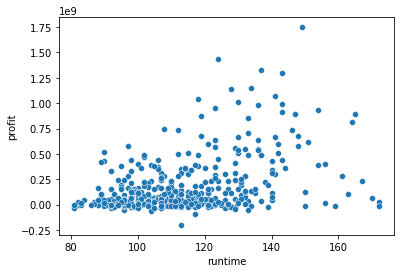

In [55]:
sns.scatterplot(x = 'runtime', y = 'profit', data = action)
plt.show()

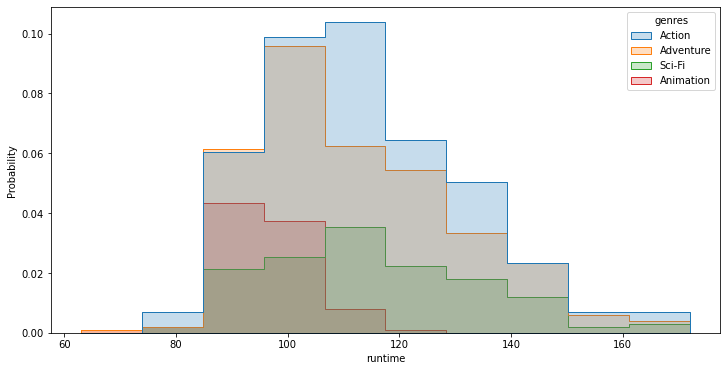

In [56]:
fig, ax = plt.subplots(figsize = (12,6))
sns.histplot(x = 'runtime', element = 'step', hue = 'genres', stat = 'probability', bins = 10, data = top_4_genres);

### Decided to split run times in 15 interval bins to treat them as categoricals

### Plotted Boxplot with a Stripplot layered on top for the median profit by run time for each genre

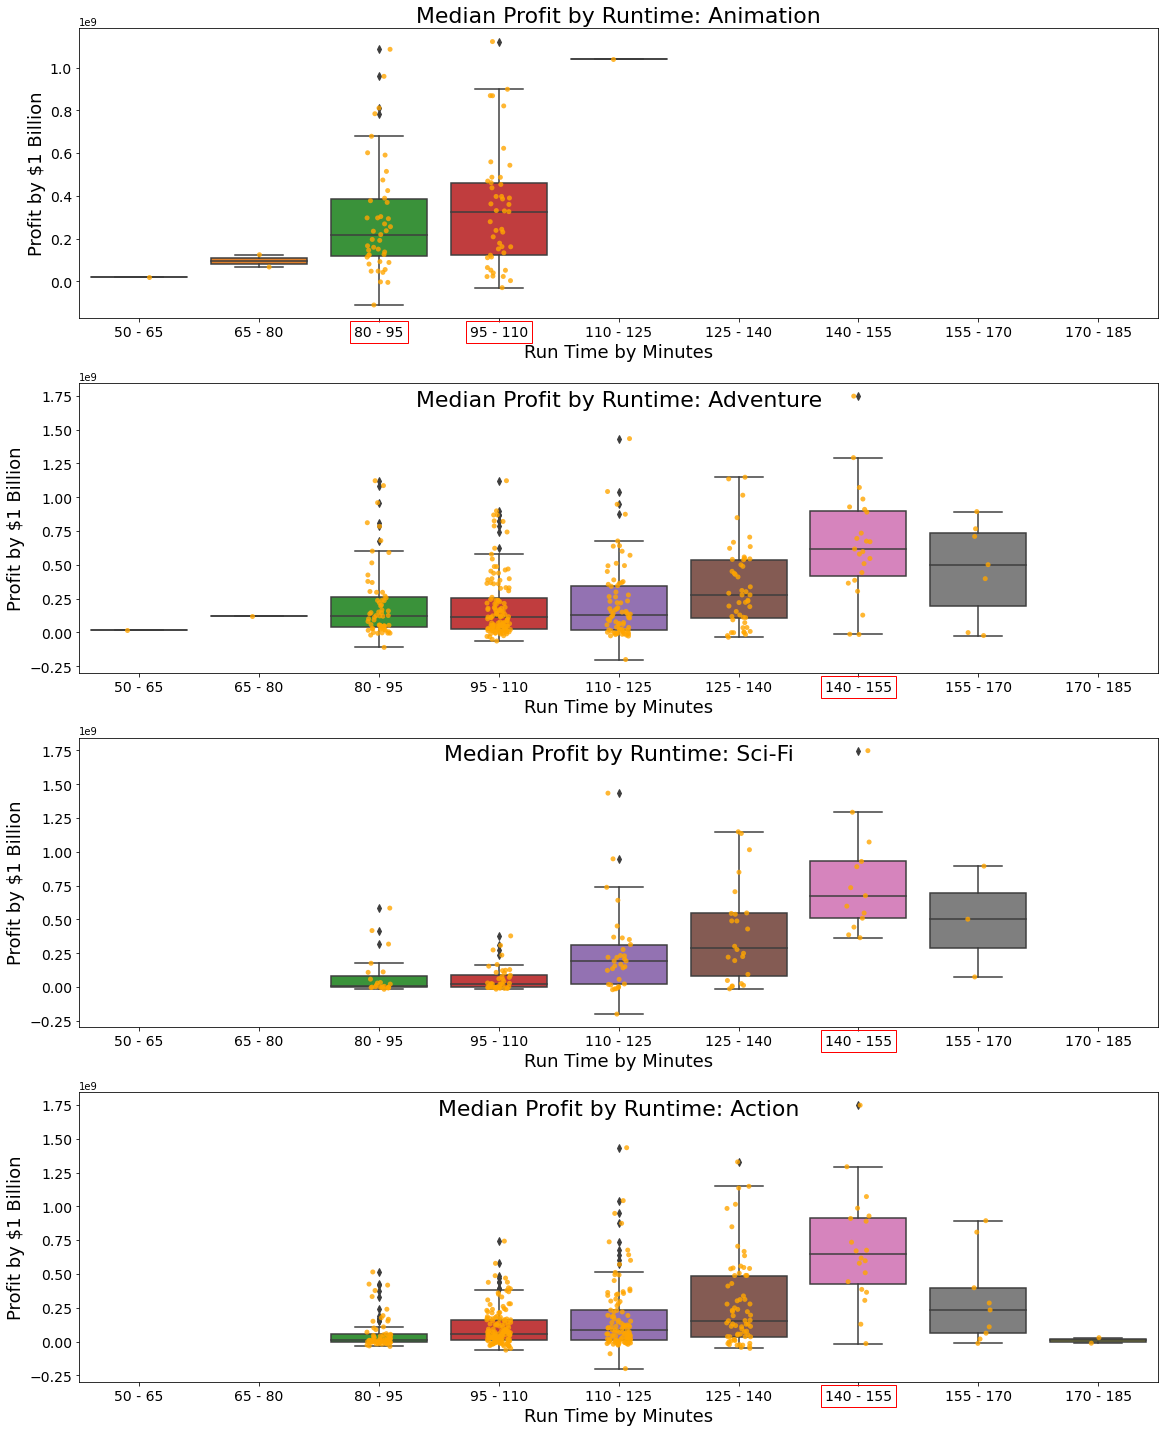

In [57]:
fig, ax = plt.subplots(4,1, figsize = (16,20))

sns.boxplot(x = 'runtime_bin', y = 'profit' , data = animation, ax =ax [0])
sns.stripplot(x = 'runtime_bin', y = 'profit' , data = animation, alpha =.8, color = 'orange', ax =ax [0])

sns.boxplot(x = 'runtime_bin', y = 'profit' , data = adventure, ax =ax [1])
sns.stripplot(x = 'runtime_bin', y = 'profit' , data = adventure, alpha =.8, color = 'orange', ax =ax [1])

sns.boxplot(x = 'runtime_bin', y = 'profit' , data = sci_Fi, ax =ax [2])
sns.stripplot(x = 'runtime_bin', y = 'profit' , data = sci_Fi, alpha =.8, color = 'orange', ax =ax [2])

sns.boxplot(x = 'runtime_bin', y = 'profit' , data = action, ax =ax [3])
sns.stripplot(x = 'runtime_bin', y = 'profit' , data = action, alpha =.8, color = 'orange', ax =ax [3])

ax[0].set_title('Median Profit by Runtime: Animation', fontsize = 22)
ax[0].set_xlabel('Run Time by Minutes', fontsize = 18)
ax[0].set_ylabel('Profit by $1 Billion', fontsize = 18)
ax[0].tick_params(labelsize = 14)

ax[1].set_title('Median Profit by Runtime: Adventure', fontsize = 22, y=1.0, pad=-23)
ax[1].set_xlabel('Run Time by Minutes', fontsize = 18)
ax[1].set_ylabel('Profit by $1 Billion', fontsize = 18)
ax[1].tick_params(labelsize = 14)

ax[2].set_title('Median Profit by Runtime: Sci-Fi', fontsize = 22, y=1.0, pad=-23)
ax[2].set_xlabel('Run Time by Minutes', fontsize = 18)
ax[2].set_ylabel('Profit by $1 Billion', fontsize = 18)
ax[2].tick_params(labelsize = 14)

ax[3].set_title('Median Profit by Runtime: Action', fontsize = 22, y=1.0, pad=-23)
ax[3].set_xlabel('Run Time by Minutes', fontsize = 18)
ax[3].set_ylabel('Profit by $1 Billion', fontsize = 18)
ax[3].tick_params(labelsize = 14)

label = ax[0].xaxis.get_ticklabels()[2]
label_2 = ax[0].xaxis.get_ticklabels()[3]

label.set_bbox(dict(facecolor='none', edgecolor='red'))
label_2.set_bbox(dict(facecolor='none', edgecolor='red'))

label_3 = ax[1].xaxis.get_ticklabels()[6]
label_3.set_bbox(dict(facecolor='none', edgecolor='red'))

label_4 = ax[2].xaxis.get_ticklabels()[6]
label_4.set_bbox(dict(facecolor='none', edgecolor='red'))

label_5 = ax[3].xaxis.get_ticklabels()[6]
label_5.set_bbox(dict(facecolor='none', edgecolor='red'))


plt.tight_layout()
plt.show()

### Analysis
- These plots each have a Boxplot with a Stripplot layered over it for each of the top 4 profitable genres
 - The Boxplots are showing a measure for Median profit, IQR, 3rd Quartile + 1.5 * IQR and 1st Quartile - 1.5 * IQR
 - The Stripplot shows individual data points for all movies that fall within each run time interval
 
- The Animation plot clearly shows the 80-95 minute and 95-110 minute intervals as the most profitable based on Median profit of all Animation movies of those run time lengths
- The other 3 plots show the remaining genres are most profitable in the 140-155 minute interval


### <ins>Recommendation # 2<ins>

- Based on the results shown above we recommend Microsoft produce a movie with specific run time lengths
- For Animation focus on run times between 80-110 minutes
- For Adventure, Sci-Fi and Action focus on run times between 140-155 minutes

## 3) Most Profitable Actors for Action Genre

In [58]:
# Query for all persons who worked on English language movies

imdb_persons = pd.read_sql("""

SELECT mb.movie_id, mb.runtime_minutes as runtime, mb.genres, mr.averagerating, mr.numvotes, mb.primary_title as movie_title, pr.person_id, pr.ordering, pr.category, p.primary_name, p.primary_profession

FROM 
    principals as pr

    INNER JOIN
    persons as p
    ON pr.person_id = p.person_id
    
    INNER JOIN
    movie_akas as ma
    ON ma.movie_id = pr.movie_id
    
    INNER JOIN
    movie_basics as mb
    ON mb.movie_id = pr.movie_id
    
    INNER JOIN
    movie_ratings as mr
    ON mr.movie_id = mb.movie_id
    
WHERE
    ma.language IS 'en'

    
""", con)

In [59]:
imdb_persons

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
0,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
1,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack"
2,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer"
3,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer"
4,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...,...
176689,tt9827784,116.0,"Music,Romance",7.7,6,Farewell Song,nm0624375,6,producer,Hiroyuki Negishi,"animation_department,producer"
176690,tt9827784,116.0,"Music,Romance",7.7,6,Farewell Song,nm4151154,7,producer,Mariko Seto,"producer,miscellaneous"
176691,tt9827784,116.0,"Music,Romance",7.7,6,Farewell Song,nm3566386,8,cinematographer,Hidetoshi Shinomiya,"cinematographer,camera_department,assistant_di..."
176692,tt9827784,116.0,"Music,Romance",7.7,6,Farewell Song,nm1395952,9,actress,Marika Matsumoto,"actress,soundtrack"


### Filter down by significant movies, genre and actor/actress names

In [60]:
# Filter by 1,000 votes in *IMDB* to yield movies of significance
imdb_1000_votes = imdb_persons[imdb_persons['numvotes'] > 1000]

In [61]:
imdb_1000_votes

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
0,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
1,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack"
2,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer"
3,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer"
4,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000318,5,director,Tim Burton,"producer,miscellaneous,director"
...,...,...,...,...,...,...,...,...,...,...,...
176546,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm9822497,6,writer,Seung-hee Yoo,writer
176547,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm0359923,7,producer,Daniel Hank,"production_manager,producer,miscellaneous"
176548,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm9418760,8,producer,Ha-Young Lee,producer
176549,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm9454922,9,actress,Cynthia Bell,None


In [62]:
# Filtering dataframe to only show names of actor/actress by movie
imdb_1000_votes_actors = imdb_1000_votes[(
    imdb_1000_votes['category'] == 'actor') | (imdb_1000_votes['category'] == 'actress')
    ]

In [63]:
imdb_1000_votes_actors

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
0,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
1,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack"
2,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer"
3,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer"
10,tt1014759,108.0,"Adventure,Family,Fantasy",6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...
176542,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm2043703,2,actor,Je-hoon Lee,"actor,soundtrack,animation_department"
176543,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm1059148,3,actor,Cheol-min Park,actor
176544,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm9470536,4,actress,Hye-ran Yeom,actress
176549,tt7342204,119.0,"Comedy,Drama",7.4,1105,I Can Speak,nm9454922,9,actress,Cynthia Bell,None


### Separating out genres of each movie and rows each actor/actress by genre type of each movie

In [64]:
imdb_1000_votes_actors_split = imdb_1000_votes_actors

In [65]:
imdb_1000_votes_actors_split['genres'] = imdb_1000_votes_actors['genres'].str.split(',')
imdb_1000_votes_actors_split_exploded = imdb_1000_votes_actors_split.explode('genres')

<ipython-input-65-649fe6f357b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_1000_votes_actors_split['genres'] = imdb_1000_votes_actors['genres'].str.split(',')


In [66]:
imdb_1000_votes_actors_split

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
0,tt1014759,108.0,"[Adventure, Family, Fantasy]",6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
1,tt1014759,108.0,"[Adventure, Family, Fantasy]",6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack"
2,tt1014759,108.0,"[Adventure, Family, Fantasy]",6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer"
3,tt1014759,108.0,"[Adventure, Family, Fantasy]",6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer"
10,tt1014759,108.0,"[Adventure, Family, Fantasy]",6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...
176542,tt7342204,119.0,"[Comedy, Drama]",7.4,1105,I Can Speak,nm2043703,2,actor,Je-hoon Lee,"actor,soundtrack,animation_department"
176543,tt7342204,119.0,"[Comedy, Drama]",7.4,1105,I Can Speak,nm1059148,3,actor,Cheol-min Park,actor
176544,tt7342204,119.0,"[Comedy, Drama]",7.4,1105,I Can Speak,nm9470536,4,actress,Hye-ran Yeom,actress
176549,tt7342204,119.0,"[Comedy, Drama]",7.4,1105,I Can Speak,nm9454922,9,actress,Cynthia Bell,None


In [67]:
imdb_1000_votes_actors_split_exploded['genres'].value_counts()

Drama          11002
Action          5762
Comedy          5293
Thriller        3368
Adventure       3300
Crime           2891
Romance         2520
Horror          2059
Animation       1677
Mystery         1494
Fantasy         1373
Biography       1136
History         1112
Sci-Fi          1057
Family           694
War              356
Music            297
Sport            200
Musical          100
Documentary       77
Western           63
Game-Show          8
Name: genres, dtype: int64

In [68]:
imdb_1000_votes_actor_top_4_genres = imdb_1000_votes_actors_split_exploded[(
    imdb_1000_votes_actors_split_exploded['genres'] == 'Action') 
    | (imdb_1000_votes_actors_split_exploded['genres'] == 'Animation') 
    | (imdb_1000_votes_actors_split_exploded['genres'] == 'Adventure')
    | (imdb_1000_votes_actors_split_exploded['genres'] == 'Sci-Fi')]

In [69]:
imdb_1000_votes_actor_top_4_genres['genres'].value_counts()

Action       5762
Adventure    3300
Animation    1677
Sci-Fi       1057
Name: genres, dtype: int64

In [70]:
# Revisiting the movie budgets dataframe
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Filtering movie_budget data for movies past 2010, needed for scenario of repeat movie titles <br> *IMDB* data only has movies past 2010 but names could repeat from previous year movie names in the movie budget data

In [71]:
# Adding column of datetime format to filter movies by year
movie_budgets_datetime = movie_budgets
movie_budgets_datetime['datetime'] = movie_budgets_datetime['release_date']
movie_budgets_datetime['datetime'] = pd.to_datetime(movie_budgets_datetime['datetime'])

In [72]:
movie_budgets_datetime = movie_budgets_datetime[
    movie_budgets_datetime['datetime'] > '2010-01-01']

In [73]:
movie_budgets_datetime

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,datetime
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019-06-07
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015-12-18
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,2014-12-31
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0,2015-05-19
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",2012-01-13
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018-12-31


In [74]:
imdb_1000_votes_actor_top_4_genres

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
0,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
1,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack"
2,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer"
3,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer"
10,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...
176191,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm3092471,4,actor,Marwan Kenzari,actor
176198,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm0000226,1,actor,Will Smith,"music_department,actor,producer"
176199,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4565815,2,actor,Mena Massoud,"actor,soundtrack"
176200,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4305463,3,actress,Naomi Scott,"actress,soundtrack"


In [75]:
imdb_1000_votes_actor_no_dups = imdb_1000_votes_actor_top_4_genres.drop_duplicates()

In [76]:
imdb_1000_votes_actor_no_dups

,movie_id,runtime,genres,averagerating,numvotes,movie_title,person_id,ordering,category,primary_name,primary_profession
0,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm1985859,1,actress,Mia Wasikowska,"actress,director,writer"
1,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000136,2,actor,Johnny Depp,"actor,producer,soundtrack"
2,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0000307,3,actress,Helena Bonham Carter,"actress,soundtrack,producer"
3,tt1014759,108.0,Adventure,6.5,358813,Alice in Wonderland,nm0004266,4,actress,Anne Hathaway,"actress,soundtrack,producer"
50,tt1272051,85.0,Adventure,5.2,1102,Space Dogs,nm1370204,1,actress,Anna Bolshova,actress
...,...,...,...,...,...,...,...,...,...,...,...
175970,tt4914580,140.0,Action,7.1,6514,The Age of Shadows,nm0258268,4,actor,Richard Epcar,"actor,miscellaneous,writer"
176178,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm0000226,1,actor,Will Smith,"music_department,actor,producer"
176179,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4565815,2,actor,Mena Massoud,"actor,soundtrack"
176180,tt6139732,128.0,Adventure,7.4,57549,Aladdin,nm4305463,3,actress,Naomi Scott,"actress,soundtrack"


In [77]:
# IMDB data for actors in top 4 genres merged with Budget/Gross/Profit
imdb_merged = imdb_1000_votes_actor_no_dups.merge(
    movie_budgets_datetime, how = "inner", left_on = 'movie_title', right_on = 'movie')

In [78]:
imdb_merged['genres'].value_counts()

Action       839
Adventure    698
Sci-Fi       248
Animation    190
Name: genres, dtype: int64

In [79]:
# Strip unwanted characters from budget and gross columns
imdb_merged['production_budget'] = imdb_merged['production_budget'].apply(lambda x: x.strip('$')) 
imdb_merged['domestic_gross'] = imdb_merged['domestic_gross'].apply(lambda x: x.strip('$')) 
imdb_merged['worldwide_gross'] = imdb_merged['worldwide_gross'].apply(lambda x: x.strip('$')) 

In [80]:
imdb_merged['production_budget'] = imdb_merged['production_budget'].apply(lambda x: int(x.replace(',','')))
imdb_merged['domestic_gross'] = imdb_merged['domestic_gross'].apply(lambda x: int(x.replace(',','')))
imdb_merged['worldwide_gross'] = imdb_merged['worldwide_gross'].apply(lambda x: int(x.replace(',','')))

In [81]:
imdb_merged_no_dups = imdb_merged.drop_duplicates()

In [82]:
imdb_merged_no_dups['profit'] = imdb_merged_no_dups['worldwide_gross'] - imdb_merged_no_dups['production_budget']

### Counting up how many movies a particular actor did of each genre

In [83]:
imdb_merged_no_dups['count_number_of_movies'] = 1

In [84]:
actors_by_movie_count = imdb_merged_no_dups.groupby(
    ['genres', 'primary_name']).sum().sort_values(by = 'count_number_of_movies', ascending = False)

In [85]:
actors_by_movie_count

runtime  averagerating  numvotes  ordering   id  \
genres    primary_name                                                         
Action    Jason Statham        909.0           51.4   1349473        14  518   
          Dwayne Johnson       958.0           52.4   1498182        14  358   
          Robert Downey Jr.    967.0           53.4   4880468        10  217   
Sci-Fi    Robert Downey Jr.    967.0           53.4   4880468        10  217   
Adventure Robert Downey Jr.    967.0           53.4   4880468        10  217   
...                              ...            ...       ...       ...  ...   
Action    Wenwen Han           140.0            6.2    146401         4   77   
          Wentworth Miller      96.0            5.9    153270         3   70   
          Walton Goggins       119.0            6.3    163560         3   70   
          Vivian Chan          104.0            5.5      3738         3   81   
Adventure Ekaterina Vilkova    114.0            6.6      1853         3   50   

                             production_budget  domestic_gross  \
genres    primary_name                                           
Action    Jason Statham              878000000       903943853   
          Dwayne Johnson             880850000      1236888335   
          Robert Downey Jr.         1650600000      3224811989   
Sci-Fi    Robert Downey Jr.         1650600000      3224811989   
Adventure Robert Downey Jr.         1650600000      3224811989   
...                                        ...             ...   
Action    Wenwen Han                  40000000       176591618   
          Wentworth Miller            57500000        60128566   
          Walton Goggins              90000000        58250803   
          Vivian Chan                 15000000        14998027   
Adventure Ekaterina Vilkova            8500000               0   

                             worldwide_gross      profit  \
genres    primary_name                                     
Action    Jason Statham           3867613376  2989613376   
          Dwayne Johnson          4490834298  3609984298   
          Robert Downey Jr.       8825868484  7175268484   
Sci-Fi    Robert Downey Jr.       8825868484  7175268484   
Adventure Robert Downey Jr.       8825868484  7175268484   
...                                      ...         ...   
Action    Wenwen Han               351774938   311774938   
          Wentworth Miller         295874190   238374190   
          Walton Goggins           273477501   183477501   
          Vivian Chan               15362298      362298   
Adventure Ekaterina Vilkova         30700192    22200192   

                             count_number_of_movies  
genres    primary_name                               
Action    Jason Statham                           8  
          Dwayne Johnson                          8  
          Robert Downey Jr.                       7  
Sci-Fi    Robert Downey Jr.                       7  
Adventure Robert Downey Jr.                       7  
...                                             ...  
Action    Wenwen Han                              1  
          Wentworth Miller                        1  
          Walton Goggins                          1  
          Vivian Chan                             1  
Adventure Ekaterina Vilkova                       1  

[1470 rows x 10 columns]

### Filtering to actors who performed in at least 4 movies of a genre <br> This threshold shows they have experience and significant data points to draw from


In [86]:
actors_over_3_movies = actors_by_movie_count[actors_by_movie_count['count_number_of_movies'] > 3]

In [87]:
actors_over_3_movies

runtime  averagerating  numvotes  ordering  \
genres    primary_name                                                       
Action    Jason Statham           909.0           51.4   1349473        14   
          Dwayne Johnson          958.0           52.4   1498182        14   
          Robert Downey Jr.       967.0           53.4   4880468        10   
Sci-Fi    Robert Downey Jr.       967.0           53.4   4880468        10   
Adventure Robert Downey Jr.       967.0           53.4   4880468        10   
Action    Chris Hemsworth         904.0           50.3   3352868        12   
Sci-Fi    Jennifer Lawrence       792.0           41.6   2635497        10   
Adventure Jennifer Lawrence       792.0           41.6   2635497        10   
Action    Liam Hemsworth          771.0           39.7   2435044        15   
Adventure Liam Hemsworth          771.0           39.7   2435044        15   
Action    Vin Diesel              750.0           40.9   2015931         7   
Adventure Chris Hemsworth         774.0           43.7   3302713        11   
Action    Jennifer Lawrence       792.0           41.6   2635497        10   
          Josh Brolin             602.0           37.0   1171294        10   
Adventure Josh Hutcherson         650.0           34.6   2097434        10   
          Cate Blanchett          658.0           36.1   1461345        15   
Action    Chris Evans             706.0           38.8   3342946        10   
          Liam Neeson             579.0           33.5    830670         7   
Sci-Fi    Liam Hemsworth          668.0           33.1   2157460        13   
          Chris Evans             706.0           38.8   3342946        10   
Action    Jon Bernthal            586.0           35.5   1081831        16   
          Russell Crowe           661.0           31.9   1030697         8   
Sci-Fi    James McAvoy            615.0           34.5   1434745         9   
Action    Tom Cruise              577.0           33.9   1286059         5   
          Nicolas Cage            519.0           25.8    330354         5   
          Bruce Willis            427.0           20.1    372804         6   
          Ryan Reynolds           438.0           28.2   1514315         5   
          Hugh Jackman            515.0           29.6   1795368         8   
Adventure Martin Freeman          562.0           29.8   1765771         9   
Action    Mark Wahlberg           514.0           26.7    604702         4   
Adventure Will Smith              457.0           25.0   1082154         6   
          Chris Evans             580.0           31.7   3103682         9   
Action    Michael Fassbender      434.0           25.9    786147         8   
          Cate Blanchett          514.0           28.7   1022724        11   
Adventure Anne Hathaway           486.0           28.2   1929719        12   
Action    Sylvester Stallone      424.0           24.9    786729         4   
Adventure Tom Hiddleston          475.0           28.4   1944975        10   
Sci-Fi    Josh Hutcherson         548.0           27.9   2002116         8   
Adventure Russell Crowe           528.0           24.5    862631         7   
          Ryan Reynolds           438.0           28.2   1514315         5   
Action    Tom Hardy               485.0           29.3   2297193        10   
          Christoph Waltz         499.0           26.4    739487        11   
          Tom Hiddleston          475.0           28.4   1944975        10   
Adventure Johnny Depp             486.0           25.9   1114980         6   
          James McAvoy            473.0           28.8   1298899         7   
          Ian McKellen            606.0           31.1   2343892         6   
Action    Josh Hutcherson         548.0           27.9   2002116         8   
          Anthony Hopkins         468.0           25.1   1074724        12   
Adventure Helena Bonham Carter    410.0           26.7    455361         9   

                                 id  production_budge

In [88]:
actors_over_3_movies = actors_over_3_movies.reset_index()

In [89]:
actors_over_3_movies['mean_profit'] = actors_over_3_movies['profit']/actors_over_3_movies['count_number_of_movies']
actors_over_3_movies['mean_production_budget'] = actors_over_3_movies['production_budget']/actors_over_3_movies['count_number_of_movies']
actors_over_3_movies['mean_averagerating'] = actors_over_3_movies['averagerating']/actors_over_3_movies['count_number_of_movies']

In [90]:
actors_over_3_movies.sort_values(by = 'mean_profit' , ascending = False).head(10)

,genres,primary_name,runtime,averagerating,numvotes,ordering,id,production_budget,domestic_gross,worldwide_gross,profit,count_number_of_movies,mean_profit,mean_production_budget,mean_averagerating
31,Adventure,Chris Evans,580.0,31.7,3103682,9,55,1105600000,2169185246,6109153473,5003553473,4,1.250888e+09,2.764000e+08,7.925000
2,Action,Robert Downey Jr.,967.0,53.4,4880468,10,217,1650600000,3224811989,8825868484,7175268484,7,1.025038e+09,2.358000e+08,7.628571
3,Sci-Fi,Robert Downey Jr.,967.0,53.4,4880468,10,217,1650600000,3224811989,8825868484,7175268484,7,1.025038e+09,2.358000e+08,7.628571
4,Adventure,Robert Downey Jr.,967.0,53.4,4880468,10,217,1650600000,3224811989,8825868484,7175268484,7,1.025038e+09,2.358000e+08,7.628571
16,Action,Chris Evans,706.0,38.8,3342946,10,82,1145600000,2173748275,6197223353,5051623353,5,1.010325e+09,2.291200e+08,7.760000
19,Sci-Fi,Chris Evans,706.0,38.8,3342946,10,82,1145600000,2173748275,6197223353,5051623353,5,1.010325e+09,2.291200e+08,7.760000
11,Adventure,Chris Hemsworth,774.0,43.7,3302713,11,248,1280600000,1995409158,5793079067,4512479067,6,7.520798e+08,2.134333e+08,7.283333
45,Adventure,Ian McKellen,606.0,31.1,2343892,6,117,950000000,1050411745,3670810819,2720810819,4,6.802027e+08,2.375000e+08,7.775000
5,Action,Chris Hemsworth,904.0,50.3,3352868,12,312,1315600000,2041228871,5864197445,4548597445,7,6.497996e+08,1.879429e+08,7.185714
10,Action,Vin Diesel,750.0,40.9,2015931,7,252,858000000,1208898770,4594397148,3736397148,6,6.227329e+08,1.430000e+08,6.816667


In [91]:
# Checking how many actors listed for each genre
actors_over_3_movies['genres'].value_counts()

Action       26
Adventure    17
Sci-Fi        6
Name: genres, dtype: int64

### Focused in on the Action genre as it has a largest pool of Actors/Actresses to draw from

In [92]:
action_actors_over_3 = actors_over_3_movies[actors_over_3_movies['genres'] == 'Action']

In [93]:
action_actors_top_10 = action_actors_over_3[action_actors_over_3['mean_profit'] > 3.737017e+08]

In [94]:
action_actors_top_10

,genres,primary_name,runtime,averagerating,numvotes,ordering,id,production_budget,domestic_gross,worldwide_gross,profit,count_number_of_movies,mean_profit,mean_production_budget,mean_averagerating
1,Action,Dwayne Johnson,958.0,52.4,1498182,14,358,880850000,1236888335,4490834298,3609984298,8,4.512480e+08,1.101062e+08,6.550000
2,Action,Robert Downey Jr.,967.0,53.4,4880468,10,217,1650600000,3224811989,8825868484,7175268484,7,1.025038e+09,2.358000e+08,7.628571
5,Action,Chris Hemsworth,904.0,50.3,3352868,12,312,1315600000,2041228871,5864197445,4548597445,7,6.497996e+08,1.879429e+08,7.185714
8,Action,Liam Hemsworth,771.0,39.7,2435044,15,291,760000000,1639711004,3654502024,2894502024,6,4.824170e+08,1.266667e+08,6.616667
10,Action,Vin Diesel,750.0,40.9,2015931,7,252,858000000,1208898770,4594397148,3736397148,6,6.227329e+08,1.430000e+08,6.816667
12,Action,Jennifer Lawrence,792.0,41.6,2635497,10,222,1005000000,1640709181,3463523999,2458523999,6,4.097540e+08,1.675000e+08,6.933333
16,Action,Chris Evans,706.0,38.8,3342946,10,82,1145600000,2173748275,6197223353,5051623353,5,1.010325e+09,2.291200e+08,7.760000
40,Action,Tom Hardy,485.0,29.3,2297193,10,181,606000000,906479578,2594879629,1988879629,4,4.972199e+08,1.515000e+08,7.325000
42,Action,Tom Hiddleston,475.0,28.4,1944975,10,296,665000000,870503865,2501981217,1836981217,4,4.592453e+08,1.662500e+08,7.100000
46,Action,Josh Hutcherson,548.0,27.9,2002116,8,177,495000000,1451538526,2958353344,2463353344,4,6.158383e+08,1.237500e+08,6.975000


### Plotting Top 10 Action movie Actors by movie mean profit

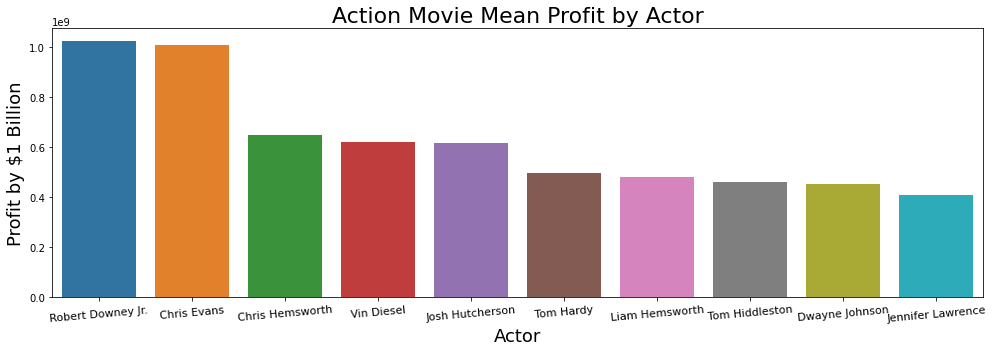

In [95]:
fig, ax = plt.subplots(figsize = (14,5))

sns.barplot(x = 'primary_name', y = 'mean_profit', 
            data = action_actors_top_10.sort_values(by = 'mean_profit' , ascending = False))

ax.set_xticklabels(ax.get_xticklabels(), rotation=5, ha="center", fontsize = 11)

ax.set_title('Action Movie Mean Profit by Actor', fontsize = 22)
ax.set_xlabel('Actor', fontsize = 18)
ax.set_ylabel('Profit by $1 Billion', fontsize = 18)

plt.tight_layout()

plt.show()

### Analysis
- This Barplot shows the top 10 actors by Mean profit within the Action genre
- This list was filtered down to only include actors with at least 4 movies in the Action genre which showed their popularity and track record of success
- The plot shows their rank in highest average profit compared to other popular actors

### <ins>Recommendation # 3<ins>

- Based on the results shown above we recommend Microsoft recruit one of the Top 10 actors listed in the plot
